#### Data Exploration: Investigate Data

In [31]:
%run './child/libraries.ipynb'

In [32]:
import pandas as pd
import random
import shelve

In [41]:
shared = load_dict('shared')
dfRaw  = load_df('dfRaw')
dfDesc = load_df('dfDesc')
dfFlt  = load_df('dfFlt')

In [42]:
list_todo()

{'todo': 'Investigate 3298 null values in response_correctness', 'finished': False}
{'todo': 'Investigate 1566 [unassigned] in response_correctness', 'finished': False}
{'todo': 'Investigate null values in item_type_code_name', 'finished': False}
{'todo': 'Reduce number of levels in item_type_code_name', 'finished': False}
{'todo': 'Remove unary learner_attempt_status = "fully scored"', 'finished': True}
{'todo': 'Investigate number_of_learners > 40 outliers', 'finished': False}
{'todo': 'Investigate binary variables assignment_attempt_number and assignment_max_attempts', 'finished': False}
{'todo': 'Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values', 'finished': False}
{'todo': 'Investigate final_score_unweighted has 16,582 zero values', 'finished': False}
{'todo': 'Replace default dates with nulls', 'finished': False}
{'todo': 'Investigate why some dates are null', 'finished': False}
{'todo': 'Remove variables assignment_late_submission, is_manua

###### Create Dataframe for Investigating Data

In [43]:
dfInv1 = dfFlt

###### Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted
Do this early so they don't get in the way

In [44]:
dfInv1 = dfInv1.drop('assignment_late_submission', 'is_manual_scoring_required', 'is_deleted')
shared['binaryVars'].remove('assignment_late_submission')
shared['binaryVars'].remove('is_manual_scoring_required')
shared['binaryVars'].remove('is_deleted')

In [45]:
finish_todo('Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted')

###### Remove unary learner_attempt_status
Do this early so they don't get in the way

In [46]:
dfInv1 = dfInv1.drop('learner_attempt_status')
shared['nominalVars'].remove('learner_attempt_status')

In [49]:
save_df(dfInv1, 'dfInv1')
save_dict(shared, 'shared')

In [48]:
finish_todo('Remove unary learner_attempt_status = "fully scored"')

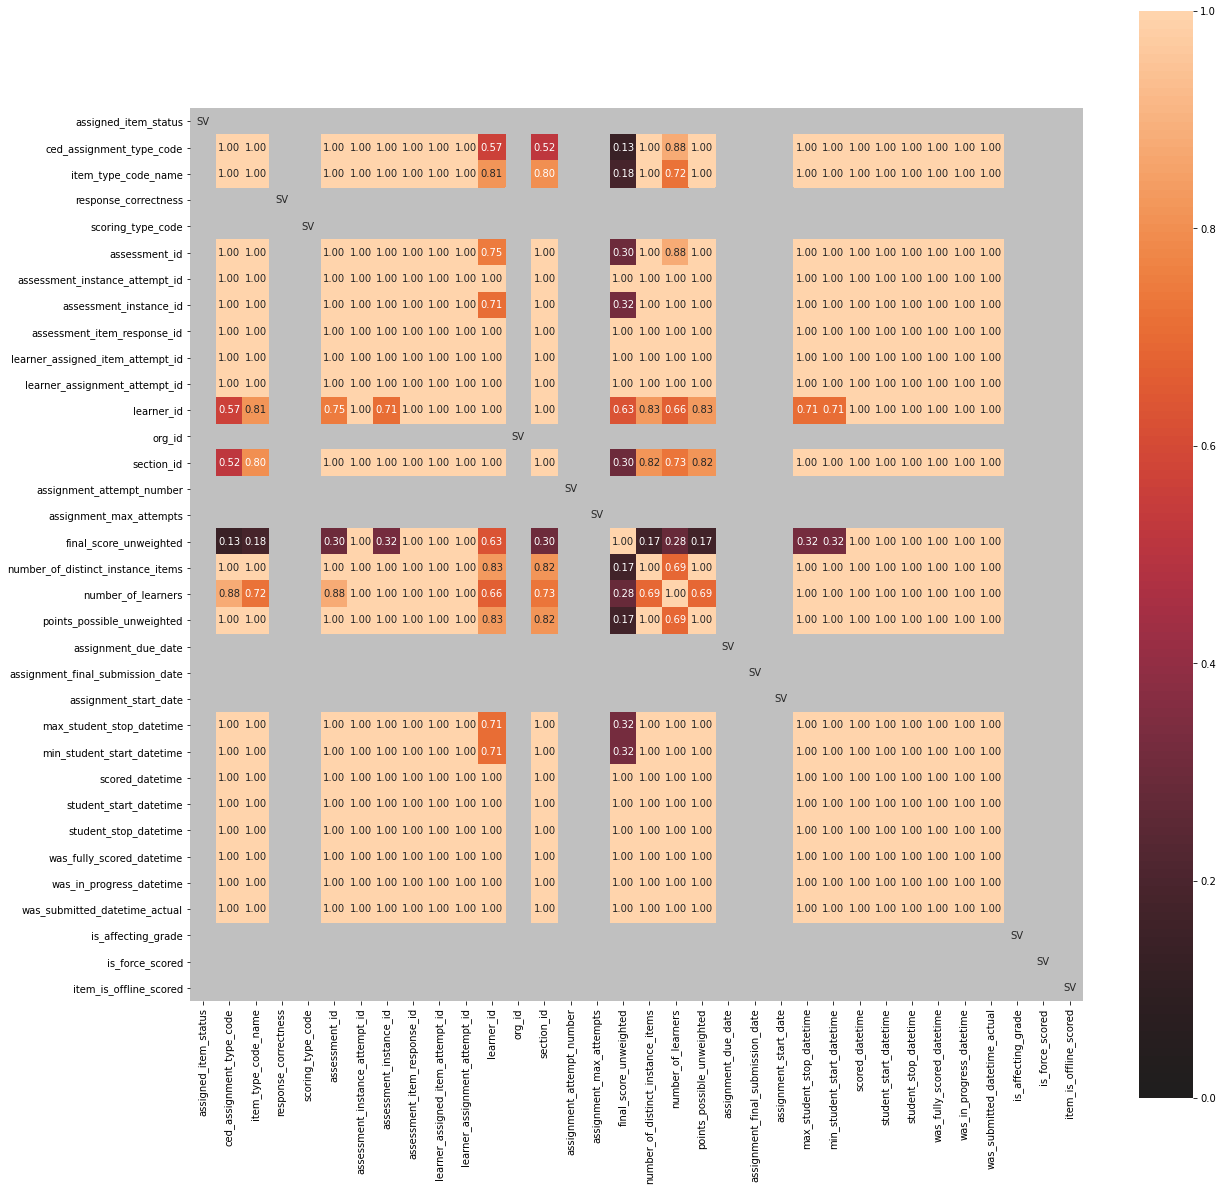

assessment_id             648915  649617  650257  651386  694589  695917  \
ced_assignment_type_code                                                   
game                         120     320     570       0      20      10   
rubric                         0       0       0       8       0       0   

assessment_id             699380  724303  724304  724364  727353  752431  
ced_assignment_type_code                                                  
game                           5     270      60      60     120       0  
rubric                         0       0       0       0       0       3  
assessment_instance_id    815220  820724  821728  821729  822619  822677  \
ced_assignment_type_code                                                   
game                           5     120     290     280     180      90   
rubric                         0       0       0       0       0       0   

assessment_instance_id    832824  861063  877536  880215  899985  916753  \
ced_assignment

NameError: name 'dfZeroAttempt' is not defined

NameError: name 'dfZeroAttempt' is not defined

In [10]:
%run './investigation/attempt-number-vs-max.ipynb'

In [ ]:
%run './investigation/1566-unassigned-in-response-correctness.ipynb'

In [51]:
dfInv2 = load_df('dfInv2')


In [52]:
list_todo()

{'todo': 'Investigate 3298 null values in response_correctness', 'finished': False}
{'todo': 'Investigate 1566 [unassigned] in response_correctness', 'finished': True}
{'todo': 'Investigate null values in item_type_code_name', 'finished': False}
{'todo': 'Reduce number of levels in item_type_code_name', 'finished': False}
{'todo': 'Remove unary learner_attempt_status = "fully scored"', 'finished': True}
{'todo': 'Investigate number_of_learners > 40 outliers', 'finished': False}
{'todo': 'Investigate binary variables assignment_attempt_number and assignment_max_attempts', 'finished': True}
{'todo': 'Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values', 'finished': True}
{'todo': 'Investigate final_score_unweighted has 16,582 zero values', 'finished': False}
{'todo': 'Replace default dates with nulls', 'finished': False}
{'todo': 'Investigate why some dates are null', 'finished': False}
{'todo': 'Remove variables assignment_late_submission, is_manual_s

In [ ]:
%run './investigation/3298-null-in-response-correctness.ipynb'


##### Investigate null values in item_type_code_name

###### Statistics of final_score_unweighted to item_type_code_name = Null

In [ ]:
dfInv.filter(F.col("item_type_code_name").isNull() == True).select("final_score_unweighted").toPandas().hist(bins=60)

- Strongly correlated to a final_score_unweighted of 0

In [ ]:
finish_todo('Investigate null values in item_type_code_name')


